In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

print("version", pd.__version__)
%load_ext lab_black

version 1.3.5
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


## Question: how does first detection correlate with testing rate

In [11]:
df = pd.read_csv(
    os.path.join(
        "..", "models", "simulated_data", "230315_disease_severity_scan", "China.csv"
    )
)
print(df.columns)

Index(['Unnamed: 0', 'simulation', 'phi_bd', 'phi_hd', 'phi_cd', 'phi_hs',
       'phi_cs', 'R0', 'ihr', 'seed_t', 'ww_time', 'bd_time', 'hd_time',
       'cd_time', 'hs_time', 'cs_time', 'ww_c_infected', 'bs_c_infected',
       'hs_c_infected', 'cs_c_infected', 'ww_n_tests', 'bs_n_tests',
       'hs_n_tests', 'cs_n_tests', 'y1_0', 'pd', 'n', 'ps', 'delta', 'eta'],
      dtype='object')


## Combine datasets of all countries


In [12]:
countries = []

data_dir = os.path.join(
    "..", "models", "simulated_data", "230315_disease_severity_scan"
)

for file in os.listdir(data_dir):
    if file[0] != ".":  # avoid hidden files
        country = file[:-4]  # assumes country.csv
        countries.append(country)

t_dfs = []
for country in countries:
    df = pd.read_csv(os.path.join(data_dir, country + ".csv"))
    df["pop"] = df.apply(
        lambda row: list(map(int, row["y1_0"].strip("[, ]").split(",")))[0], axis=1
    )
    df["pop/n"] = df.apply(lambda row: row["pop"] / row["n"], axis=1)
    t_df = df[
        [
            "R0",
            "phi_bd",
            "phi_hd",
            "phi_cd",
            "phi_hs",
            "bd_time",
            "hd_time",
            "cd_time",
            "pop",
            "pop/n",
        ]
    ]
    t_dfs.append(t_df)

df_merged = pd.concat(t_dfs, ignore_index=True, sort=False)

In [13]:
df_merged

,R0,phi_bd,phi_hd,phi_cd,phi_hs,bd_time,hd_time,cd_time,pop,pop/n
0,2,0.1,0.1,0.000021,0.1,131,137,171,17533044,1.276430e+03
1,2,0.1,0.1,0.000021,0.1,131,121,158,17533044,1.276430e+03
2,2,0.1,0.1,0.000021,0.1,110,134,163,17533044,1.276430e+03
3,2,0.1,0.1,0.000021,0.1,131,131,198,17533044,1.276430e+03
4,2,0.1,0.1,0.000021,0.1,128,139,171,17533044,1.276430e+03
...,...,...,...,...,...,...,...,...,...,...
799995,5,0.5,0.5,0.000533,0.5,78,87,101,1412360000,3.504615e+06
799996,5,0.5,0.5,0.000533,0.5,86,75,85,1412360000,3.504615e+06
799997,5,0.5,0.5,0.000533,0.5,89,82,99,1412360000,3.504615e+06
799998,5,0.5,0.5,0.000533,0.5,83,90,91,1412360000,3.504615e+06


In [14]:
df_merged.describe()

,R0,phi_bd,phi_hd,phi_cd,phi_hs,bd_time,hd_time,cd_time,pop,pop/n
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,8.000000e+05
mean,3.500000,0.300000,0.300000,0.000186,0.300000,82.043711,87.200272,114.641379,4.283527e+08,4.745867e+05
std,1.118035,0.141421,0.141421,0.000186,0.141421,43.464357,43.725299,52.461990,5.740020e+08,1.148516e+06
min,2.000000,0.100000,0.100000,0.000021,0.100000,0.000000,10.000000,16.000000,1.753304e+07,9.528314e+02
25%,2.750000,0.200000,0.200000,0.000053,0.200000,51.000000,55.000000,76.000000,5.618619e+07,2.433389e+03
50%,3.500000,0.300000,0.300000,0.000107,0.300000,70.000000,75.000000,99.000000,7.547286e+07,4.115350e+03
75%,4.250000,0.400000,0.400000,0.000213,0.400000,102.000000,109.000000,142.000000,6.008113e+08,7.486676e+04
max,5.000000,0.500000,0.500000,0.000533,0.500000,283.000000,288.000000,339.000000,1.412360e+09,3.504615e+06


## Do some EDA

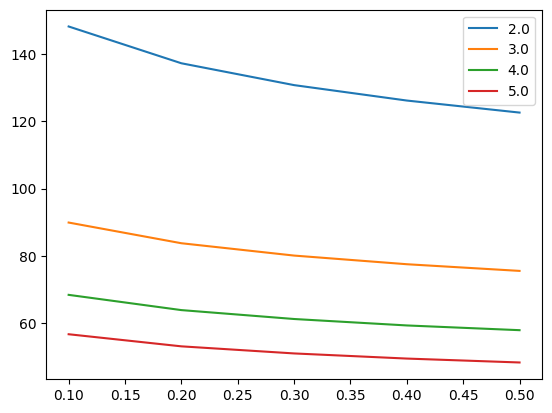

In [15]:
# maybe seperate this by pop as well
plt.figure()
for R0 in [2.0, 3.0, 4.0, 5.0]:
    # df_merged.loc[(df_merged.R0 == R0)].boxplot("bd_time", "phi_bd")
    plt.plot(
        df_merged.loc[(df_merged.R0 == R0)]["phi_bd"].unique(),
        df_merged.loc[(df_merged.R0 == R0)].groupby(["phi_bd"]).mean()["bd_time"],
        label=R0,
    )
    plt.legend()

# df_merged.groupby('n')['seed_t'].describe()

[[27. 39. 49. 60. 75.]
 [24. 35. 43. 53. 67.]
 [22. 32. 40. 49. 62.]
 [21. 30. 38. 46. 59.]
 [21. 30. 37. 44. 57.]]


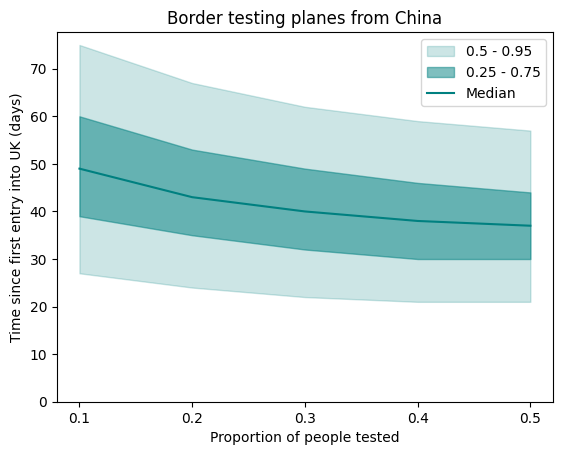

In [83]:
country = "China"
df = pd.read_csv(
    os.path.join(
        "..",
        "models",
        "simulated_data",
        "230315_disease_severity_scan",
        country + ".csv",
    )
)

R0 = 2
phis = [0.1, 0.2, 0.3, 0.4, 0.5]

quantiles = []
for phi in phis:
    t_diff = (
        df.loc[(df.R0 == R0) & (df.phi_bd == phi)]["hd_time"]
        - df.loc[(df.R0 == R0) & (df.phi_bd == phi)]["seed_t"]
    )
    quantiles.append(np.quantile(t_diff, q=[0.05, 0.25, 0.5, 0.75, 0.95]))


quantiles = np.array(quantiles)
print(quantiles)


plt.xlabel("Proportion of people tested")
plt.ylabel("Time since first entry into UK (days)")
plt.title("Border testing planes from " + country)
plt.fill_between(
    phis, quantiles[:, 0], quantiles[:, 4], color="teal", alpha=0.2, label="0.5 - 0.95"
)
plt.fill_between(
    phis, quantiles[:, 1], quantiles[:, 3], color="teal", alpha=0.5, label="0.25 - 0.75"
)
plt.ylim(bottom=0)
plt.xticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5])
plt.plot(phis, quantiles[:, 2], "teal", label="Median")
plt.legend()
plt.savefig("detection_time.png", dpi=300)

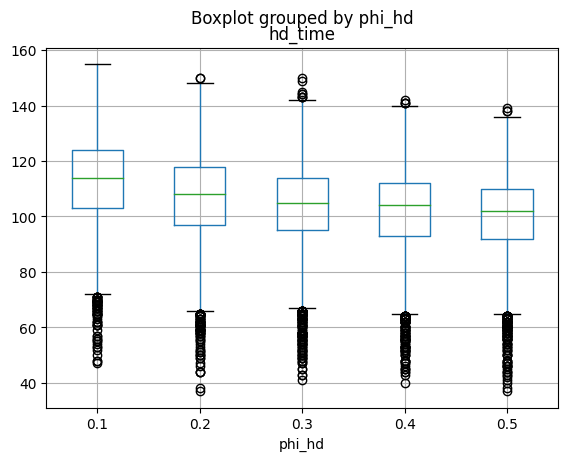

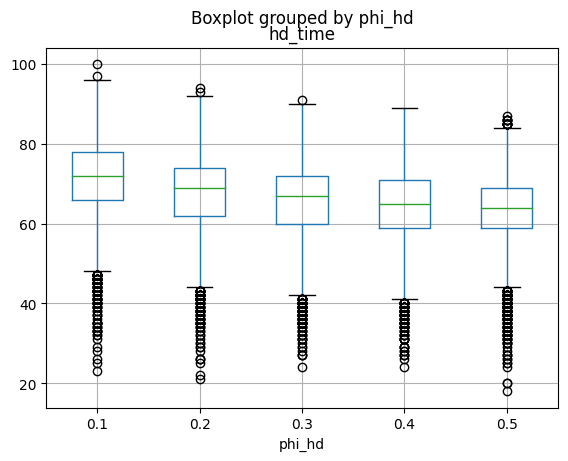

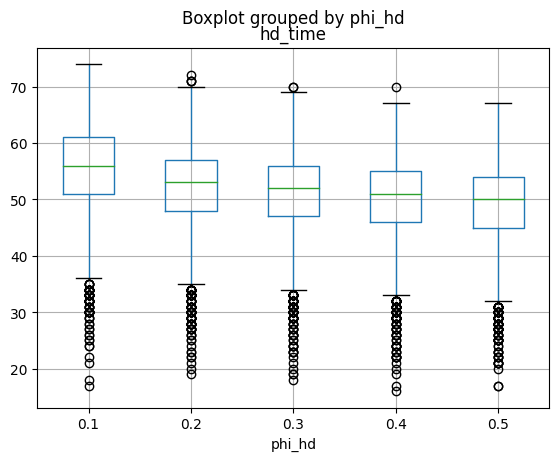

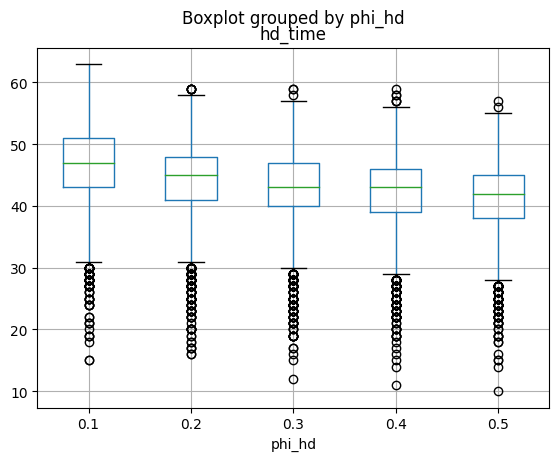

In [20]:
for R0 in [2.0, 3.0, 4.0, 5.0]:
    df.loc[(df.R0 == R0)].boxplot("hd_time", "phi_hd")

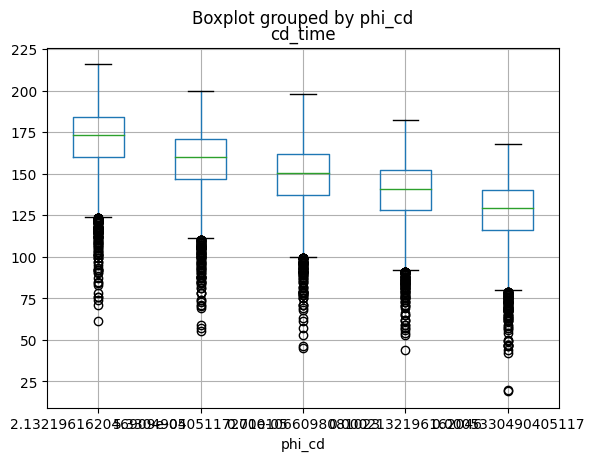

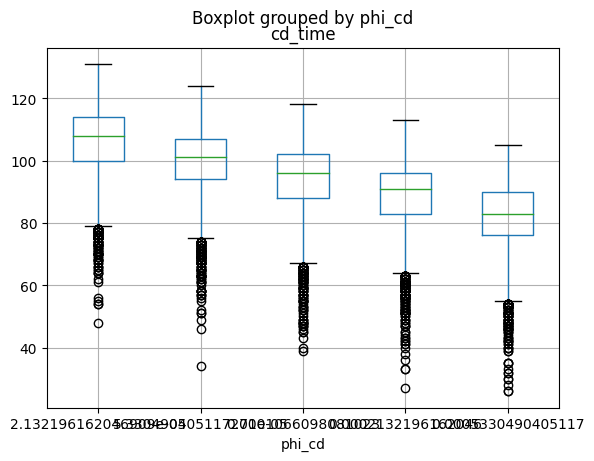

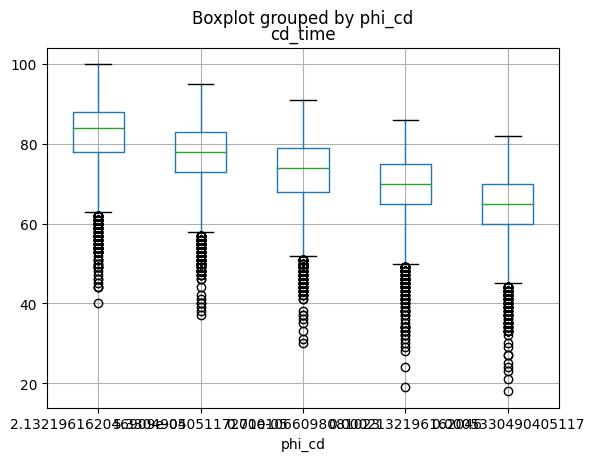

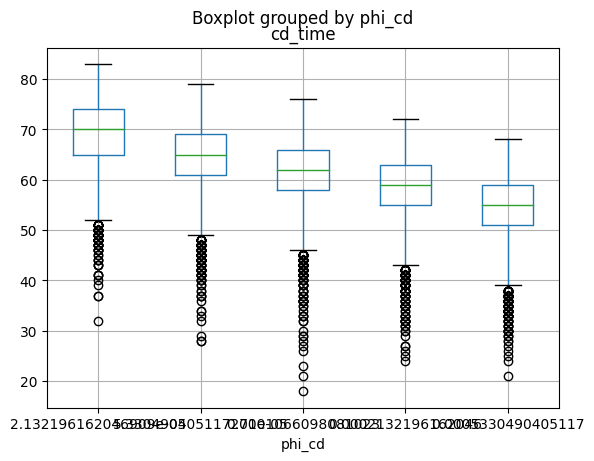

In [21]:
for R0 in [2.0, 3.0, 4.0, 5.0]:
    df.loc[(df.R0 == R0)].boxplot("cd_time", "phi_cd")